In [1]:
import sys, os, glob, warnings, logging
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sw_plotting import change_bar_width
from sw_utilities import tukeyTest
from scipy.stats import ttest_ind

# logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.DEBUG)
logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.INFO)

# ignore warnings
warnings.filterwarnings('ignore')

# plotting configuration
font = {'family' : 'Arial',
        'size'   : 7}
matplotlib.rc('font', **font)
plt.rcParams['svg.fonttype'] = 'none'

# Make a folder if it is not already there to store exported figures
!mkdir ../jupyter_figures

mkdir: ../jupyter_figures: File exists


In [2]:
# Read in the data

df_control = pd.read_csv('../data/SMG-collagenase-Col4-pHH3-Ecad/210207-SMG-control-1-Col4-pHH3-Ecad-40x-20um-temp-pHH3-2889.txt',
                         sep='\t')
df_control['groups'] = ['control']*len(df_control)

# df_collagenase = pd.read_csv('../data-210207-SMG-collagenase-Col4-pHH3-Ecad/210207-SMG-collagenase-1-Col4-pHH3-Ecad-40x-20um-temp-pHH3-4423.txt',
#                              sep='\t')
df_collagenase = pd.read_csv('../data/SMG-collagenase-Col4-pHH3-Ecad/210207-SMG-collagenase-1-Col4-pHH3-Ecad-40x-20um-temp-pHH3-4534.txt',
                             sep='\t')
df_collagenase['groups'] = ['collagenase']*len(df_collagenase)

df = pd.concat([df_control, df_collagenase])
df.reset_index(inplace=True, drop=True)

df.head()

,filename,area_epi,pHH3_thres_area_epi,percent_pHH3_thres_area_epi,area_mes,pHH3_thres_area_mes,percent_pHH3_thres_area_mes,groups
0,1-MIP,37848.1436,7896.2384,20.8629,39040.7936,398.2225,1.0200,control
1,2-MIP,34642.3803,5257.8822,15.1776,41910.9739,332.7007,0.7938,control
2,3-MIP,32643.3897,3971.2728,12.1656,36166.2899,711.9969,1.9687,control
3,4-MIP,28970.5196,3545.8616,12.2396,37818.6491,484.6882,1.2816,control
4,5-MIP,27924.7652,6536.9979,23.4093,45656.6673,1247.4116,2.7322,control


Ttest_indResult(statistic=1.047314777828163, pvalue=0.3174219470247178)

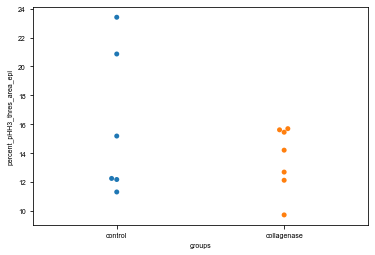

In [3]:
# Quick visualization of surface layer proliferation over time
sns.swarmplot(data=df, x='groups', y='percent_pHH3_thres_area_epi')
# tukeyTest(df.percent_pHH3_thres_area_epi, df.groups)
ttest_ind(df_control.percent_pHH3_thres_area_epi, df_collagenase.percent_pHH3_thres_area_epi)

Ttest_indResult(statistic=-0.24558992692699363, pvalue=0.8105215928893569)

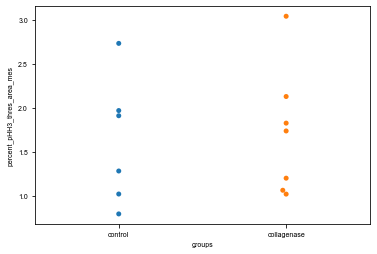

In [4]:
# Quick visualization of surface layer proliferation over time
sns.swarmplot(data=df, x='groups', y='percent_pHH3_thres_area_mes')
# tukeyTest(df.percent_pHH3_thres_area_mes, df.groups)
ttest_ind(df_control.percent_pHH3_thres_area_mes, df_collagenase.percent_pHH3_thres_area_mes)

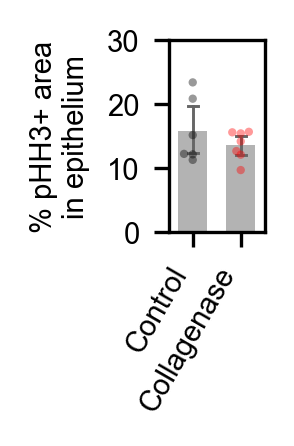

In [12]:
# Combined swarm and bar plot over time for figures

outputPrefix = '210206-SMG-collagenase-proliferation-epi-40x-bar-swarm'
outputFigPath = "../jupyter_figures/" + outputPrefix + ".svg"
x_col = 'groups'
y_col = 'percent_pHH3_thres_area_epi'

fig_width = 0.4
fig_height = 0.8
fig = plt.figure(figsize=(fig_width,fig_height), dpi=300)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

# Customize color of each group
paletteDict = {'control': 'black', 'collagenase': 'red'}

ax = sns.swarmplot(data=df, x=x_col, y=y_col,
                   hue=x_col, palette=paletteDict,
                   size=2.0,
                   alpha=.4)

ax = sns.barplot(data=df, x=x_col, y=y_col,
                 color=".7", alpha=1.0,
                 errwidth=.7, errcolor=".4", capsize=.2, ci=95)

plt.ylim(0, 30)
# plt.yticks([0, 10, 20])

plt.xlabel(None)
plt.ylabel("% pHH3+ area\nin epithelium")


# rotate x tick labels if necessary
x_labels = ["Control", "Collagenase"]
# x_labels = ax.get_xticklabels()
ax.set_xticklabels(labels=x_labels, rotation=60, ha="right")

# make the bar width narrower
change_bar_width(ax, .6)

# remove legend
ax.get_legend().remove()

for o in fig.findobj():
    o.set_clip_on(False)
for o in ax.findobj():
    o.set_clip_on(False)

if outputFigPath is not None:
    plt.savefig(outputFigPath)


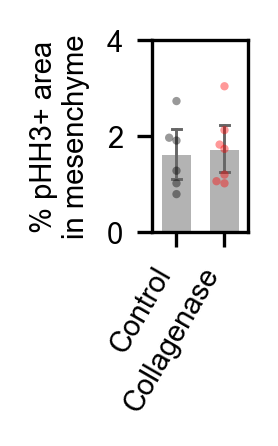

In [14]:
# Combined swarm and bar plot over time for figures

outputPrefix = '210206-SMG-collagenase-proliferation-mes-40x-bar-swarm'
outputFigPath = "../jupyter_figures/" + outputPrefix + ".svg"
x_col = 'groups'
y_col = 'percent_pHH3_thres_area_mes'

fig_width=0.4
fig_height=0.8
fig = plt.figure(figsize=(fig_width,fig_height), dpi=300)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

# Customize color of each group
paletteDict = {'control': 'black', 'collagenase': 'red'}

ax = sns.swarmplot(data=df, x=x_col, y=y_col,
                   hue=x_col, palette=paletteDict,
                   size=2.0,
                   alpha=.4)

ax = sns.barplot(data=df, x=x_col, y=y_col,
                 color=".7", alpha=1.0,
                 errwidth=.7, errcolor=".4", capsize=.2, ci=95)

plt.ylim(0, 4.0)
# plt.yticks([0, 10, 20])

plt.xlabel(None)
plt.ylabel("% pHH3+ area\nin mesenchyme")


# rotate x tick labels if necessary
x_labels = ["Control", "Collagenase"]
# x_labels = ax.get_xticklabels()
ax.set_xticklabels(labels=x_labels, rotation=60, ha="right")

# make the bar width narrower
change_bar_width(ax, .6)

# remove legend
ax.get_legend().remove()

for o in fig.findobj():
    o.set_clip_on(False)
for o in ax.findobj():
    o.set_clip_on(False)

if outputFigPath is not None:
    plt.savefig(outputFigPath)
